In [60]:
import numpy as np
class Our_PCA:
    
    def __init__(self,n_components=2):
        self.n_components = n_components
        self.features = None
        self._mean = None
        
        
    def fit_pca(self, X):
        # placing mean to  our origin data
        self._mean = np.mean(X,axis=0)
        X = X - self._mean
        
        #Co- variance of N,D ---> D*D
        
        covariance = np.dot(X.T,X)/(X.shape[0]-1)
        #print(covariance.shape)
        #We compute the eigvalue and the eigvector
        eigenvalue,eigenvector = np.linalg.eig(covariance)
        
        # For computation we to tranpose the matrix
        eigenvector = eigenvector.T
        
        indexs = np.argsort(eigenvalue)[::-1]
        print(indexs,' indexs')
        
        eigenvector = eigenvector[indexs]
        
        
        eigenvalue  = eigenvalue[indexs]
        
        
        total = sum(eigenvalue)
        var_of_features = [(i/total)*100 for i in eigenvalue]
        print(var_of_features)
        self.features = eigenvector[:self.n_components]
        
    def aplly(self, X):
        X = X - self._mean
        
        return np.dot(X,self.features.T)

In [3]:
from sklearn.datasets import load_iris

In [42]:
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])



In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
# import the data from web site 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 

In [61]:
# We split the data target and X
target = data.target
X  = data[['sepal length','sepal width','petal length','petal width']]

In [62]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
# We
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [64]:
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [65]:
# create de l'object
pca = Our_PCA(2)

In [66]:
pca.fit_pca(X)

[0 1 2 3]  indexs
[72.77045209380134, 23.030523267680632, 3.6838319576273904, 0.515192680890632]


In [67]:
project_x = pca.aplly(X)

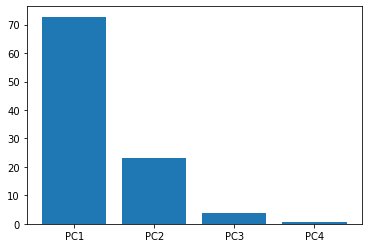

In [73]:
va_perct = [72.77045209380134, 23.030523267680632, 3.6838319576273904, 0.515192680890632]
columns=['PC1','PC2','PC3','PC4',]
plt.bar(x = range(1,5),height=va_perct,tick_label=columns )

plt.show()

In [74]:
pca.features

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577]])

In [69]:
principa_df = pd.DataFrame(project_x,columns=['PC1','PC2',])
principa_df = pd.concat([principa_df,pd.DataFrame(target)],axis=1)

In [70]:
principa_df

,PC1,PC2,target
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa
...,...,...,...
145,1.870522,-0.382822,Iris-virginica
146,1.558492,0.905314,Iris-virginica
147,1.520845,-0.266795,Iris-virginica
148,1.376391,-1.016362,Iris-virginica


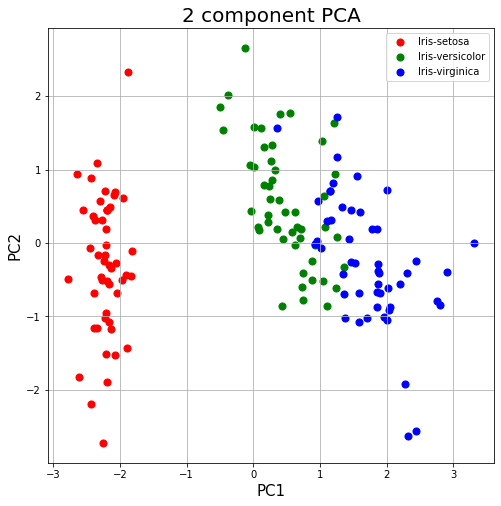

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principa_df['target'] == target
    ax.scatter(principa_df.loc[indicesToKeep, 'PC1']
               , principa_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [76]:
from sklearn.decomposition import PCA

In [79]:
pca2 =  PCA(n_components=2)

In [80]:
principalC = pca2.fit_transform(X)

In [81]:
princD = pd.DataFrame(data= principalC, columns=['PC1','PC2'])

In [82]:
princD

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362
